## Problem 5

### part a)

In [1]:
import pickle
import re

In [2]:
f = open('speeches.pkl', 'rb')
speeches = pickle.load(f)

In [4]:
# speeches is a list
# 1st index contains president, speech, & year

### Clean data

In [5]:
# define a regular expression
remove = re.compile(r"""
    (
    [\n\r\x95\x97\x80\x99\x94]  # delimiters
    |[0-9]+[a-zA-Z]+            # ordinal numbers
    |\d.                        # all digits
    |[$,+;\]"\[%^&{}:\-()]          # metacharacters
    |[A-Z][a-z]{0,3}\.          # abbreviations
    )
""", re.VERBOSE)

In [6]:
speech_count = len(speeches)  # 226 speeches [from Washington to Obama]
address = [[]] * speech_count
presidents = []
year = []

# replace expressions w/ single whitespace
for i in range(speech_count):
    address[i] = remove.sub(' ', speeches[i][1])
    presidents.append(speeches[i][0])
    year.append(speeches[i][2])

In [7]:
f.close()

In [8]:
parsed_speeches = [[]] * speech_count

"""
1. Convert capitalcase to lowercase
2. Split each speech w/ period as separator
3. Remove empty sentences w/ filter method
4. Return list w/ sentences per speech
"""
for j in range(speech_count):
    parsed_speeches[j] = list(filter(None, address[j].lower().split('.')))


### Part b)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
def linear_regression(X, Y):
    """Computes the linear regression."""
    
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    values = len(X)
    
    numerator = 0
    denominator = 0
    
    for i in range(values):
        numerator += (X[i] - mean_x) * (Y[i] - mean_y)
        denominator += (X[i] - mean_x) ** 2
    b1 = numerator / denominator
    b0 = mean_y - (b1 * mean_x)
    
    """Returns y-intercept and slope"""
    return [b0, b1]

In [11]:
# calculate number of sentences per address
num_sentences = np.zeros(len(parsed_speeches))
for count in range(speech_count):
    num_sentences[count] = len(parsed_speeches[count])

In [12]:
# convert year to numpy array
year = np.array(year, dtype=int)

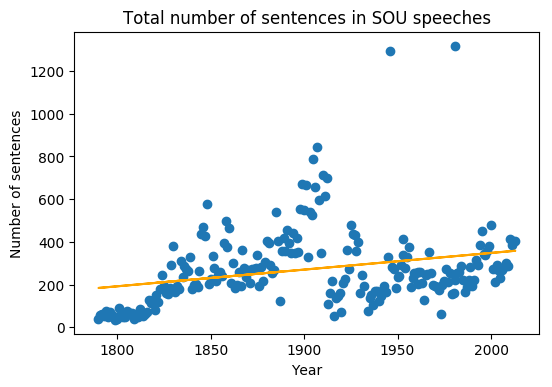

In [13]:
y_int, slope = linear_regression(year, num_sentences)
model_1 = slope * year + y_int

# plotting 
plt.figure(dpi=100)
plt.plot(year, model_1, c='orange')
plt.scatter(year, num_sentences)
plt.xlabel('Year')
plt.ylabel('Number of sentences')
plt.title('Total number of sentences in SOU speeches')
plt.show()

A linear fit does not correctly gauge the trend.
<br>Nevertheless, the number of sentences throughout the years have been increasing.

In [14]:
"""
Calculate:
1. Average sentence length
2. Total words per speech
3. Longest and shortest sentences
"""

average = np.zeros(speech_count)
total_words = np.zeros(speech_count)

longest_sentence = 0
shortest_sentence = 0
tmp = 0

for i in range(len(parsed_speeches)):
    count = 0
    for j in range(len(parsed_speeches[i])):
        count += len(parsed_speeches[i][j].split())
        
        tmp = len(parsed_speeches[i][j].split())
        if longest_sentence < tmp:
            longest_sentence = tmp
            
        else:
            shortest_sentence = tmp
            
    total_words[i] = count
    average[i] =  total_words[i] / len(parsed_speeches[i])
    

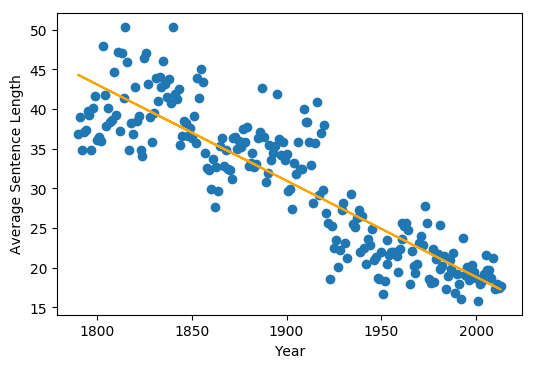

In [15]:
parameters_2 = linear_regression(year, average)
model_2 = parameters_2[1] * year + parameters_2[0]

# plotting 
plt.figure(dpi=100)
plt.scatter(year, average)
plt.plot(year, model_2, c='orange')
plt.xlabel('Year')
plt.ylabel('Average Sentence Length')
#plt.title('Average sentence length in SOU speeches')
plt.show()

There's a decreasing trend on the average sentence length.

### Part c)

In [16]:
first_half  = np.where(year < 1913)
second_half = np.where(year > 1912)

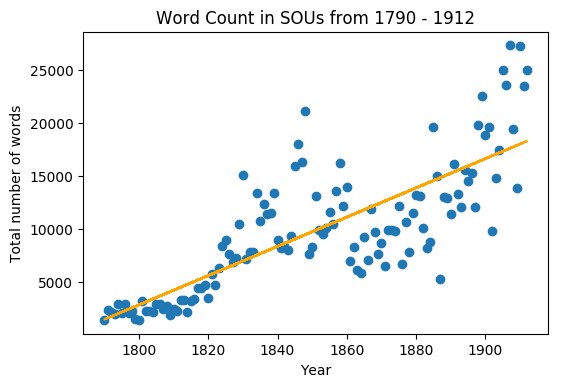

In [17]:
parameters_3 = linear_regression(year[first_half[0]], total_words[first_half])
model_3 = parameters_3[1] * year[first_half[0]] + parameters_3[0]

# plotting 
plt.figure(dpi=100)
plt.scatter(year[first_half[0]], total_words[first_half])
plt.plot(year[first_half[0]], model_3, c='orange')
plt.xlabel('Year')
plt.ylabel('Total number of words')
plt.title('Word Count in SOUs from 1790 - 1912')
plt.show()

Sentences are gettng shorter, but the words count has been increasing.

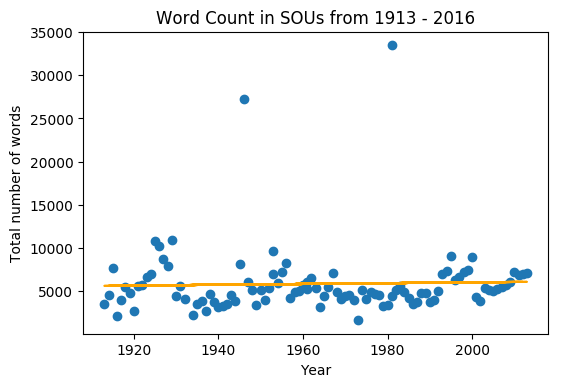

In [18]:
parameters_4 = linear_regression(year[second_half[0]], total_words[second_half])
model_4 = parameters_4[1] * year[second_half[0]] + parameters_4[0]

# plotting 
plt.figure(dpi=100)
plt.scatter(year[second_half[0]], total_words[second_half])
plt.plot(year[second_half[0]], model_4, c='orange')
plt.xlabel('Year')
plt.ylabel('Total number of words')
plt.title('Word Count in SOUs from 1913 - 2016')
plt.show()

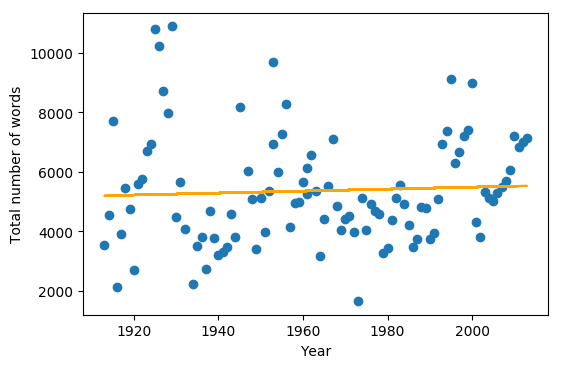

In [19]:
# remove two outliers
outliers = np.where(total_words[second_half] > 2e4)
clean_year = np.delete(year[second_half[0]], outliers)
clean_total_words = np.delete(total_words[second_half], outliers)

# new model
parameter_5 = linear_regression(clean_year, clean_total_words)
model_5 = parameter_5[1] * clean_year + parameter_5[0]
# plotting
plt.figure(dpi=100)
plt.scatter(clean_year, clean_total_words)
plt.plot(clean_year, model_5, c='orange')
plt.xlabel('Year')
plt.ylabel('Total number of words')
#plt.title('Word Count in SOUs from 1913 - 2016 [outliers removed]')
plt.show();

The two outliers do not allow for a proper viewing, however, it
<br>appears that word count for this period has been some what constant.
<br>Radio and television could be a factor for this. Speeches now reach the entire 
<br>country so they have to appeal to the entire spectrum.

### Part d)

In [20]:
print('The longest sentence on average is: {:.2f} words'.format(average.max()))

The longest sentence on average is: 50.40 words


In [21]:
index = np.where(average == average.max())  # np.where returns the index of what's inside the parenthesis
president_max = speeches[index[0][0]][0]
print('This corresponds to president: ', president_max)

This corresponds to president:  James Madison


In [22]:
print('The shortest sentence on average is: {:.2f} words'.format(average.min()))

The shortest sentence on average is: 15.81 words


In [23]:
index = np.where(average == average.min())
president_min = speeches[index[0][0]][0]
print('This corresponds to president: ', president_min)

This corresponds to president:  George W. Bush


In [24]:
print('The 25% quantile is: {:.2f}'.format(np.percentile(average, 25)))
print('The median is: {:.2f}'.format(np.median(average)))
print('The 75% quantile is: {:.2f}'.format(np.percentile(average, 75)))

The 25% quantile is: 21.95
The median is: 32.53
The 75% quantile is: 37.45


In [25]:
print('The longest sentence ever spoken was:', longest_sentence, 'words')
print('The shortest sentence ever spoken was: ', shortest_sentence, 'words')

The longest sentence ever spoken was: 580 words
The shortest sentence ever spoken was:  2 words
